In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

import behavior_generation_lecture_python.lateral_control_riccati.lateral_control_riccati as cl
import behavior_generation_lecture_python.utils.generate_reference_curve as ref
from behavior_generation_lecture_python.lateral_control_riccati.lateral_control_riccati import (
    DynamicVehicleState,
)
from behavior_generation_lecture_python.utils.plot_vehicle import plot_vehicle as pv
from behavior_generation_lecture_python.utils.vizard import vizard as vz
from behavior_generation_lecture_python.vehicle_models.vehicle_parameters import (
    DEFAULT_VEHICLE_PARAMS,
)

interactive_widgets = not os.getenv("CI") == "true"
if interactive_widgets:
    # Use widget backend locally, to be able to interact with the plots
    %matplotlib widget
else:
    # Use inline backend in CI, to render the notebooks for the hosted docs
    %matplotlib inline

In [ ]:
def main() -> None:
    print("Running simulation...")
    radius = 500
    initial_state = DynamicVehicleState(
        x=0.0,
        y=float(-radius),
        heading=0.0,
        sideslip_angle=0.0,
        yaw_rate=0.0,
    )
    initial_velocity = 33.0

    curve = ref.generate_reference_curve(
        np.array([0, radius, 0, -radius, 0]),
        np.array([-radius, 0, radius, 0, radius]),
        10.0,
    )
    time_vector = np.arange(0, 40, 0.1)

    # control_weight = 10  # hectic steering behavior
    control_weight = 10000  # fairly calm steering behavior

    model = cl.LateralControlRiccati(
        initial_state=initial_state,
        curve=curve,
        vehicle_params=DEFAULT_VEHICLE_PARAMS,
        initial_velocity=initial_velocity,
        control_weight=control_weight,
    )

    trajectory = model.simulate(time_vector, velocity=initial_velocity, time_step=0.1)
    x = trajectory[:, 0]
    y = trajectory[:, 1]
    psi = trajectory[:, 2]
    delta = trajectory[:, 5]

    fig, ax = plt.subplots()

    plt.plot(curve.x, curve.y, "r-", linewidth=0.5)
    plt.plot(x, y, "b-")
    plt.axis("equal")

    (point1,) = ax.plot([], [], marker="o", color="blue", ms=5)

    def update(i: int, *fargs: object) -> None:
        for line in reversed(ax.lines[1:]):
            line.remove()
        ax.plot(x[: i + 1], y[: i + 1], "b-", linewidth=0.5)
        point1.set_data(x[i : i + 1], y[i : i + 1])
        pv.plot_vehicle(ax, x[i], y[i], psi[i], delta[i])
        for farg in fargs:
            print(farg)

    _ = vz.Vizard(fig, update, time_vector)
    plt.show()

Running simulation...


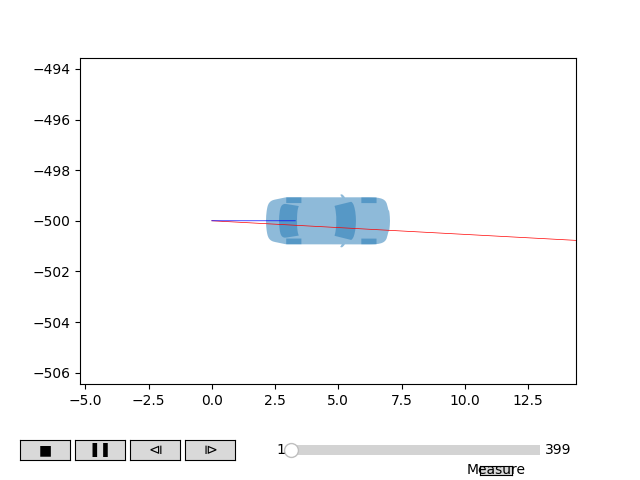

In [3]:
main()